In [357]:
# PURPOSE: to determine the zipcodes that are most similar

In [358]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
sns.set()
import math

In [359]:
# Read in data. Data is already clean.
precinct_data = pd.read_csv("ExternalDataByZipcode.csv")
income_age_data = precinct_data[["Zip Codesort column", "Median Household Income", "Median Age"]]
income_age_data = income_age_data.set_index('Zip Codesort column')
income_age_data

,Median Household Income,Median Age
Zip Codesort column,,
77002,"$87,888",37.2
77003,"$86,707",36.1
77004,"$55,289",35.9
77005,"$185,974",37.8
77006,"$90,467",41.3
...,...,...
77562,"$64,515",36.1
77571,"$87,410",36.9
77586,"$110,253",41.3


In [373]:
import re

# Create matrix where every entry is the absolute difference in med household income in precinct
incomes = pd.DataFrame(columns=income_age_data.index, index=income_age_data.index)
max_income_diff = 0 # keep track of max diff for normalization purposes later on
for zipcode2 in incomes.columns:
    for zipcode1 in incomes.index:
        med_income1_str = income_age_data.loc[zipcode1, "Median Household Income"]
        med_income2_str = income_age_data.loc[zipcode2, "Median Household Income"]
        # remove non-numeric vals from med_income1 and med_income2
        med_income1 = re.sub('[^0-9]','', med_income1_str)
        med_income2 = re.sub('[^0-9]','', med_income2_str)

        incomes.loc[zipcode1, zipcode2] = abs(float(med_income1) - float(med_income2))
        max_income_diff = max(max_income_diff, abs(float(med_income1) - float(med_income2)))
    # cast to floats
    incomes[zipcode2] = pd.to_numeric(incomes[zipcode2])

# Normalize incomes matrix
for zipcode1 in incomes.index:
    for zipcode2 in incomes.columns:
        incomes.loc[zipcode1, zipcode2] = 1 - incomes.loc[zipcode1, zipcode2] / max_income_diff

incomes

Zip Codesort column,77002,77003,77004,77005,77006,77007,77008,77009,77010,77011,...,77521,77530,77532,77536,77547,77562,77571,77586,77587,77598
Zip Codesort column,,,,,,,,,,,,,,,,,,,,,
77002,1.000000,0.993726,0.826822,0.478931,0.986299,0.786979,0.819693,0.873157,0.914689,0.722625,...,0.941500,0.894746,0.947737,0.984031,0.794071,0.875834,0.997461,0.881189,0.802863,0.871648
77003,0.993726,1.000000,0.833096,0.472657,0.980025,0.780705,0.813419,0.879431,0.908415,0.728899,...,0.947774,0.901020,0.954011,0.977757,0.800345,0.882108,0.996265,0.874915,0.809137,0.877922
77004,0.826822,0.833096,1.000000,0.305753,0.813122,0.613802,0.646515,0.953666,0.741511,0.895803,...,0.885322,0.932076,0.879085,0.810853,0.967249,0.950988,0.829361,0.708011,0.976041,0.955174
77005,0.478931,0.472657,0.305753,1.000000,0.492632,0.691952,0.659238,0.352088,0.564242,0.201557,...,0.420431,0.373677,0.426668,0.494900,0.273003,0.354765,0.476392,0.597742,0.281795,0.350579
77006,0.986299,0.980025,0.813122,0.492632,1.000000,0.800680,0.833394,0.859456,0.928389,0.708925,...,0.927800,0.881045,0.934036,0.997732,0.780371,0.862133,0.983760,0.894890,0.789163,0.857947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77562,0.875834,0.882108,0.950988,0.354765,0.862133,0.662813,0.695527,0.997323,0.790523,0.846791,...,0.934334,0.981088,0.928097,0.859865,0.918237,1.000000,0.878373,0.757023,0.927029,0.995814
77571,0.997461,0.996265,0.829361,0.476392,0.983760,0.784440,0.817154,0.875696,0.912149,0.725165,...,0.944040,0.897285,0.950276,0.981492,0.796611,0.878373,1.000000,0.878650,0.805403,0.874187
77586,0.881189,0.874915,0.708011,0.597742,0.894890,0.905790,0.938504,0.754346,0.966500,0.603814,...,0.822689,0.775935,0.828926,0.897158,0.675260,0.757023,0.878650,1.000000,0.684052,0.752837


In [374]:
# Create matrix where every entry is the absolute difference in med age in precinct
ages = pd.DataFrame(columns=income_age_data.index, index=income_age_data.index)
max_age_diff = 0 # keep track of max diff for normalization purposes later on
for zipcode2 in ages.columns:
    for zipcode1 in ages.index:
        med_age1 = income_age_data.loc[zipcode1, "Median Age"]
        med_age2 = income_age_data.loc[zipcode2, "Median Age"]
        ages.loc[zipcode1, zipcode2] = abs(float(med_age1) - float(med_age2))
        max_age_diff = max(max_age_diff, abs(float(med_age1) - float(med_age2)))
    # cast to floats
    ages[zipcode2] = pd.to_numeric(ages[zipcode2])

# Normalize ages matrix
for zipcode1 in ages.index:
    for zipcode2 in ages.columns:
        ages.loc[zipcode1, zipcode2] = 1 - ages.loc[zipcode1, zipcode2] / max_age_diff
ages

Zip Codesort column,77002,77003,77004,77005,77006,77007,77008,77009,77010,77011,...,77521,77530,77532,77536,77547,77562,77571,77586,77587,77598
Zip Codesort column,,,,,,,,,,,,,,,,,,,,,
77002,1.000000,0.957854,0.950192,0.977011,0.842912,0.946360,0.873563,0.992337,0.639847,0.846743,...,0.900383,0.766284,0.984674,0.996169,0.758621,0.957854,0.988506,0.842912,0.766284,0.919540
77003,0.957854,1.000000,0.992337,0.934866,0.800766,0.904215,0.831418,0.965517,0.597701,0.888889,...,0.942529,0.808429,0.973180,0.961686,0.800766,1.000000,0.969349,0.800766,0.808429,0.961686
77004,0.950192,0.992337,1.000000,0.927203,0.793103,0.896552,0.823755,0.957854,0.590038,0.896552,...,0.950192,0.816092,0.965517,0.954023,0.808429,0.992337,0.961686,0.793103,0.816092,0.969349
77005,0.977011,0.934866,0.927203,1.000000,0.865900,0.969349,0.896552,0.969349,0.662835,0.823755,...,0.877395,0.743295,0.961686,0.973180,0.735632,0.934866,0.965517,0.865900,0.743295,0.896552
77006,0.842912,0.800766,0.793103,0.865900,1.000000,0.896552,0.969349,0.835249,0.796935,0.689655,...,0.743295,0.609195,0.827586,0.839080,0.601533,0.800766,0.831418,1.000000,0.609195,0.762452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77562,0.957854,1.000000,0.992337,0.934866,0.800766,0.904215,0.831418,0.965517,0.597701,0.888889,...,0.942529,0.808429,0.973180,0.961686,0.800766,1.000000,0.969349,0.800766,0.808429,0.961686
77571,0.988506,0.969349,0.961686,0.965517,0.831418,0.934866,0.862069,0.996169,0.628352,0.858238,...,0.911877,0.777778,0.996169,0.992337,0.770115,0.969349,1.000000,0.831418,0.777778,0.931034
77586,0.842912,0.800766,0.793103,0.865900,1.000000,0.896552,0.969349,0.835249,0.796935,0.689655,...,0.743295,0.609195,0.827586,0.839080,0.601533,0.800766,0.831418,1.000000,0.609195,0.762452


<AxesSubplot: xlabel='Zip Codesort column', ylabel='Zip Codesort column'>

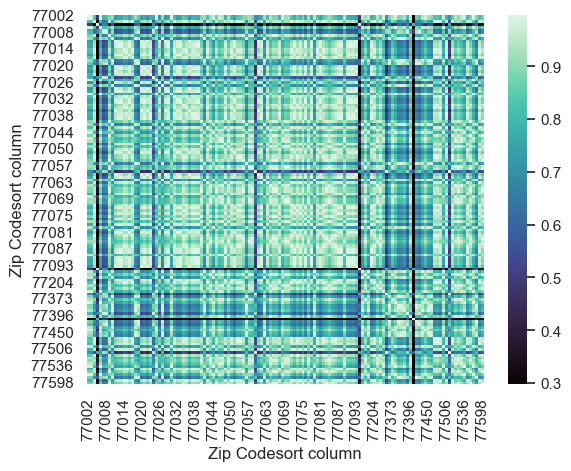

In [375]:
# make side-by-side heat map of med household income and med age
income_hmap = sns.heatmap(incomes, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
income_hmap

<AxesSubplot: xlabel='Zip Codesort column', ylabel='Zip Codesort column'>

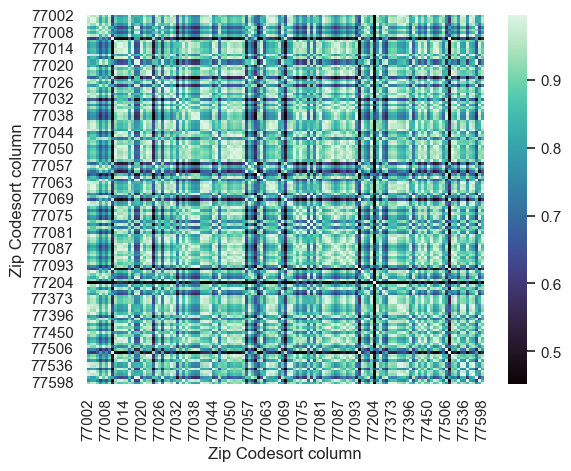

In [376]:
# make side-by-side heat map of med household income and med age
age_hmap = sns.heatmap(ages, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
age_hmap

Text(0.5, 1.0, 'Similarity in Median Age')

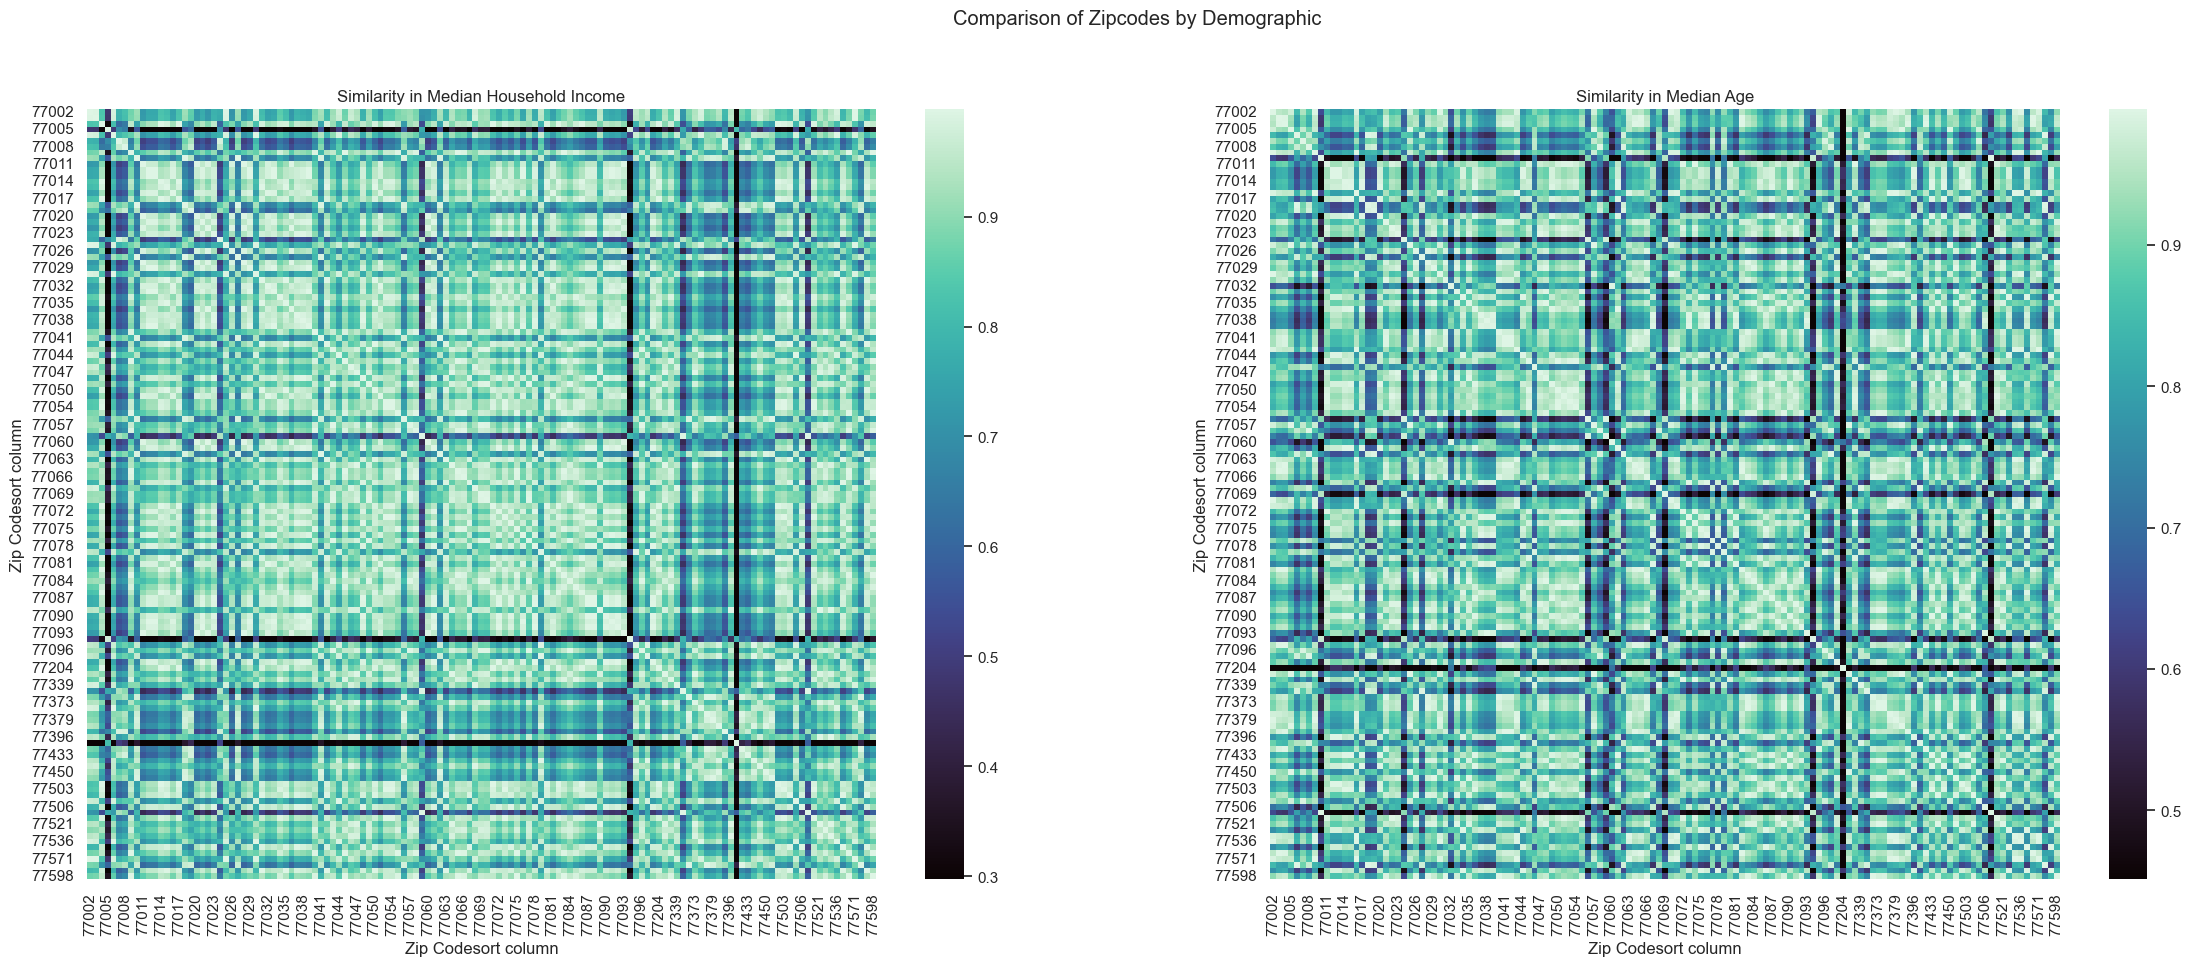

In [377]:
hmaps, axes = plt.subplots(1, 2, figsize=(28, 10))
hmaps.suptitle("Comparison of Zipcodes by Demographic")
sns.heatmap(ax=axes[0], data=incomes, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
sns.heatmap(ax=axes[1], data=ages, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
axes[0].set_title("Similarity in Median Household Income")
axes[1].set_title("Similarity in Median Age")

In [365]:
# Analyzing race percentages in zipcodes
race_data = precinct_data[['Zip Codesort column','White Percentage', 'Black/AfricanAmerican Percentage',
       'Pacific Islander Percentage', 'Asian Percentage',
       'Other Race Population', '2+ Races Percentage', 'Population']]
race_data = race_data.set_index('Zip Codesort column')

# clean data to change percentages to decimals
for column in race_data.columns:
    for zipcode in race_data.index:
        race_data.loc[zipcode, column] = re.sub('[^0-9|.]','', race_data.loc[zipcode, column])
    race_data[column] = pd.to_numeric(race_data.loc[:, column])

# if entry == 0, change it to be 0.001
for column in race_data.columns:
    for zipcode in race_data.index:
        if race_data.loc[zipcode, column] == 0:
            race_data.loc[zipcode, column] = 0.00001

race_data

,White Percentage,Black/AfricanAmerican Percentage,Pacific Islander Percentage,Asian Percentage,Other Race Population,2+ Races Percentage,Population
Zip Codesort column,,,,,,,
77002,53.34,32.53,0.02000,3.04,8.91,1.84,10929
77003,53.93,23.96,0.00001,4.37,13.56,3.82,7854
77004,31.96,51.73,0.05000,7.06,5.43,3.44,10990
77005,75.16,2.16,0.03000,17.27,1.26,3.82,20278
77006,76.57,5.45,0.06000,7.81,5.91,3.68,17883
...,...,...,...,...,...,...,...
77562,68.84,10.64,0.00001,0.33,16.09,3.24,8122
77571,77.10,6.54,0.10000,1.44,10.43,3.70,31237
77586,81.11,4.79,0.10000,5.99,3.90,3.72,20673


In [366]:
# calculate mean percentages and insert at top of df
white_perc = race_data.loc[:, 'White Percentage'].mean(),
black_perc = race_data.loc[:, 'Black/AfricanAmerican Percentage'].mean(),
pi_perc = race_data.loc[:, 'Pacific Islander Percentage'].mean(),
asian_perc = race_data.loc[:, 'Asian Percentage'].mean(),
other_perc = race_data.loc[:, 'Other Race Population'].mean(),
twomore_perc = race_data.loc[:, '2+ Races Percentage'].mean()
means = pd.Series([race_data.loc[:, 'White Percentage'].mean(),
                  race_data.loc[:, 'Black/AfricanAmerican Percentage'].mean(),
                  race_data.loc[:, 'Pacific Islander Percentage'].mean(),
                  race_data.loc[:, 'Asian Percentage'].mean(),
                  race_data.loc[:, 'Other Race Population'].mean(),
                  race_data.loc[:, '2+ Races Percentage'].mean()])
means

0    53.452331
1    19.656992
2     0.058722
3     6.870301
4    15.627293
5     3.652782
dtype: float64

In [367]:
actual_race_pop = pd.DataFrame(columns=["White", "Black", "Pacific Islander", "Asian", "Other", "2+"],
                                 index=race_data.index)
for row_idx in range(0, race_data.shape[0]):
    for col_idx in range(0, race_data.shape[1]-1):
        # population is last column in race_data
        actual_race_pop.iloc[row_idx, col_idx] = np.round(race_data.iloc[row_idx, col_idx] * race_data.iloc[row_idx, race_data.shape[1]-1] / 100, 0)
actual_race_pop

,White,Black,Pacific Islander,Asian,Other,2+
Zip Codesort column,,,,,,
77002,5830.0,3555.0,2.0,332.0,974.0,201.0
77003,4236.0,1882.0,0.0,343.0,1065.0,300.0
77004,3512.0,5685.0,5.0,776.0,597.0,378.0
77005,15241.0,438.0,6.0,3502.0,256.0,775.0
77006,13693.0,975.0,11.0,1397.0,1057.0,658.0
...,...,...,...,...,...,...
77562,5591.0,864.0,0.0,27.0,1307.0,263.0
77571,24084.0,2043.0,31.0,450.0,3258.0,1156.0
77586,16768.0,990.0,21.0,1238.0,806.0,769.0


In [394]:
# create matrix of zipcodes vs zipcodes to determine p-value of how different two zipcodes are in terms of racial distribution
races_pvalue = pd.DataFrame(columns=race_data.index, index=race_data.index)

for zipcode2 in race_data.index:
    for zipcode1 in race_data.index:
        # make a df for fisher exact test:
        #       zipcode1    zipcode2
        # races     %           %
        compare_two_zipcodes = [[race_data.loc[zipcode1, "White Percentage"],
                                 race_data.loc[zipcode1, "Black/AfricanAmerican Percentage"],
                                 race_data.loc[zipcode1, "Pacific Islander Percentage"],
                                 race_data.loc[zipcode1, "Asian Percentage"],
                                 race_data.loc[zipcode1, "Other Race Population"],
                                 race_data.loc[zipcode1, "2+ Races Percentage"]],
                                [race_data.loc[zipcode2, "White Percentage"],
                                 race_data.loc[zipcode2, "Black/AfricanAmerican Percentage"],
                                 race_data.loc[zipcode2, "Pacific Islander Percentage"],
                                 race_data.loc[zipcode2, "Asian Percentage"],
                                 race_data.loc[zipcode2, "Other Race Population"],
                                 race_data.loc[zipcode2, "2+ Races Percentage"]]]
        result = chi2_contingency(compare_two_zipcodes)
        races_pvalue.loc[zipcode1, zipcode2] = result[1]
    races_pvalue[zipcode2] = pd.to_numeric(races_pvalue[zipcode2])
# print(compare_two_zipcodes)
%store races_pvalue
races_pvalue

Stored 'races_pvalue' (DataFrame)


Zip Codesort column,77002,77003,77004,77005,77006,77007,77008,77009,77010,77011,...,77521,77530,77532,77536,77547,77562,77571,77586,77587,77598
Zip Codesort column,,,,,,,,,,,,,,,,,,,,,
77002,1.000000e+00,6.665712e-01,2.661093e-02,6.502764e-09,6.240299e-05,4.575587e-05,2.477432e-04,2.338781e-04,1.612418e-04,1.134563e-06,...,2.499944e-01,7.777637e-04,2.310054e-02,2.773489e-06,3.157218e-05,3.330111e-03,3.398005e-04,1.497029e-05,4.737499e-08,0.091259
77003,6.665712e-01,1.000000e+00,1.254124e-03,1.786119e-07,1.474105e-03,1.629718e-03,6.690916e-03,1.956893e-02,3.564947e-03,2.102846e-04,...,9.099693e-01,5.465369e-02,1.388236e-01,1.143315e-04,3.013138e-03,5.824955e-02,6.747955e-03,2.217738e-04,1.505757e-05,0.689403
77004,2.661093e-02,1.254124e-03,1.000000e+00,1.061283e-13,8.679088e-11,1.055115e-10,7.052659e-11,2.812642e-11,1.056506e-07,1.660653e-14,...,2.261674e-05,1.036281e-09,1.528900e-08,3.246645e-14,1.551696e-12,5.323317e-10,1.912153e-11,8.649152e-12,5.336737e-16,0.000127
77005,6.502764e-09,1.786119e-07,1.061283e-13,1.000000e+00,1.544933e-01,1.849912e-01,1.207010e-02,9.631356e-07,2.785834e-15,5.224920e-07,...,3.860910e-08,5.936730e-09,4.661280e-06,1.087636e-03,3.553280e-08,1.537877e-06,3.597578e-04,1.517886e-01,4.464257e-08,0.000054
77006,6.240299e-05,1.474105e-03,8.679088e-11,1.544933e-01,1.000000e+00,9.987161e-01,9.231794e-01,9.249153e-03,4.005531e-10,1.977888e-03,...,9.799785e-04,2.139608e-04,3.516430e-02,2.258567e-01,6.097277e-04,1.723244e-02,3.315320e-01,9.747305e-01,1.214723e-04,0.022430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77562,3.330111e-03,5.824955e-02,5.323317e-10,1.537877e-06,1.723244e-02,1.395883e-02,1.714463e-01,8.159718e-01,1.004276e-04,3.191422e-01,...,2.835965e-01,4.339240e-01,9.564289e-01,9.995594e-02,6.491165e-01,1.000000e+00,6.263607e-01,7.266133e-03,5.814030e-02,0.020670
77571,3.398005e-04,6.747955e-03,1.912153e-11,3.597578e-04,3.315320e-01,2.459456e-01,8.616837e-01,3.883515e-01,1.031317e-07,1.648044e-01,...,2.539429e-02,3.112057e-02,6.615468e-01,7.198632e-01,9.782689e-02,6.263607e-01,1.000000e+00,2.934418e-01,1.788122e-02,0.007779
77586,1.497029e-05,2.217738e-04,8.649152e-12,1.517886e-01,9.747305e-01,8.748253e-01,7.952307e-01,2.814642e-03,1.523356e-11,7.955337e-04,...,1.572832e-04,3.383175e-05,1.940444e-02,2.331633e-01,1.580715e-04,7.266133e-03,2.934418e-01,1.000000e+00,4.119034e-05,0.002645


Text(0.5, 1.0, 'p-value of Racial Distribution between Zipcodes')

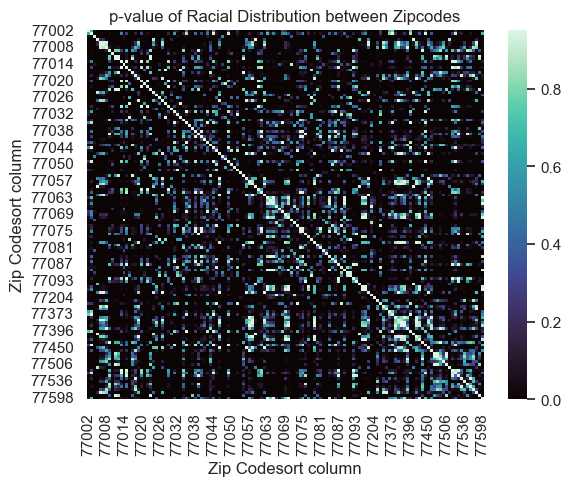

In [393]:
hmap_race_dist = sns.heatmap(races_pvalue, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
hmap_race_dist.set_title("p-value of Racial Distribution between Zipcodes")

In [370]:
# TODO: find 15 highest p-values between targetted zipcodes and non-targetted zipcodes